<a href="https://colab.research.google.com/github/ykitaguchi77/GravCont_classification_colab/blob/master/Human_prediction_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Human_prediction**

In [69]:
import os
import pandas as pd
import glob
import os.path as osp
import random
from PIL import Image
import sys
import datetime

#サポートパッチのインポート
from google.colab.patches import cv2_imshow
import cv2

#Google colabをマウント
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#画像とラベル表示のための関数を定義

In [0]:
#対象のパスからラベルを抜き出して表示
def selectName():
    evaluator_list = df.columns.values[2:]

    k=0
    for i in evaluator_list:
        print(str(k)+": "+ i)
        k+= 1
    print(str(k)+": 終了する")
    evaluator = input('名前を選んで下さい')

    if int(evaluator) == k:
        print('ﾌﾟﾛｸﾞﾗﾑを終了します。有難うございました。')
        sys.exit()
    elif int(evaluator) > k:
        raise Exception("表示されている番号を選んで下さい")
        sys.exit()
    elif str.isdigit(evaluator) == False:
        raise Exception("数字を入力して下さい")
    
    return(evaluator)

def confirmName(evaluator):
    print('\n確認：あなたの名前は'+str(colname[int(evaluator)+2])+'ですか？')
    confirmName = input('0:はい 1:いいえ 2:中止')
    if confirmName == '0':
        pass
    elif confirmName == '1':
        print('')
        print('')
    elif confirmName == '2':
        print('ﾌﾟﾛｸﾞﾗﾑを終了します。有難うございました')
    return(confirmName)

def getlabel(image_path):
    image_name = int(os.path.basename(image_path.split('.', 1)[0]))  #パスから画像番号を抜き出し
    label = os.path.basename(os.path.dirname(image_path))  #パスからの数字を抜き出す
    return(image_name, label)


def showImage(image_path):
    #画像のインポート
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    #画像のリサイズ
    height = img.shape[0]
    width = img.shape[1]
    resized_img = cv2.resize(img, (int(width*300/height), 300))
    cv2_imshow(resized_img)

def hum_prediction():
    while True:
        print(class_name[1]+'：「0」')  #contは0
        print(class_name[0]+'：「1」')  #gravは1
        print('評価を中断する: 「2」')
        pred = input('ラベルを入力して下さい')
        if pred == '1':
            hum_pred = class_name[0]
            break
        elif pred == '0':
            hum_pred = class_name[1]
            break
        elif pred == '2':
            hum_pred = 'exit'
            break
        else:
            print('0-2を入力して下さい')
    return hum_pred  #class_nameで出力される


#メインプログラム



In [104]:
#ファイル名の取得

image_path = glob.glob("/content/drive/My Drive/Deep_learning/gravcont_seed_1234/*/*/*")
#random.shuffle(image_path)  #表示順をランダムにする
print(len(image_path))
print(image_path) 

#対象画像のパスからラベルを抜き出す


#ファイル名よりラベルを抜き出し、'class_name'を定義
class_name = ["grav", "cont"]
print(class_name)

#image_path = image_path[0:5]  #テスト用にデータセットを減らす


636
['/content/drive/My Drive/Deep_learning/gravcont_seed_1234/train/grav/3237.JPG', '/content/drive/My Drive/Deep_learning/gravcont_seed_1234/train/grav/3802.jpg', '/content/drive/My Drive/Deep_learning/gravcont_seed_1234/train/grav/2900.jpg', '/content/drive/My Drive/Deep_learning/gravcont_seed_1234/train/grav/1453.jpg', '/content/drive/My Drive/Deep_learning/gravcont_seed_1234/train/grav/7449.JPG', '/content/drive/My Drive/Deep_learning/gravcont_seed_1234/train/grav/6855.jpg', '/content/drive/My Drive/Deep_learning/gravcont_seed_1234/train/grav/374.jpg', '/content/drive/My Drive/Deep_learning/gravcont_seed_1234/train/grav/1438.jpg', '/content/drive/My Drive/Deep_learning/gravcont_seed_1234/train/grav/950.JPG', '/content/drive/My Drive/Deep_learning/gravcont_seed_1234/train/grav/5913.jpg', '/content/drive/My Drive/Deep_learning/gravcont_seed_1234/train/grav/4486.jpg', '/content/drive/My Drive/Deep_learning/gravcont_seed_1234/train/grav/5890.jpg', '/content/drive/My Drive/Deep_learnin

#**表を作成**

In [105]:
image_name_list = []
label_list = []

for i in image_path:
    image_name, label = getlabel(i)  #画像の名前とラベルを取得
    image_name_list.append(image_name) #image_nameを番号でリストに格納
    label_list.append(label)

colname = ['image_name','Label','inoue', 'kohzaki', 'morimoto', 'kitaguchi', 'kawasaki'] #evaluatorの名前
df = pd.DataFrame(index=None, columns=colname) #表を作る

df.iloc[:,0] = image_name_list #0列目にラベルを代入する
df.iloc[:,1] = label_list #1列目にラベルを代入する
df = df.sort_values("image_name", ascending=True) #画像番号順に並び替える
df = df.reset_index(drop=True) #インデックスの番号をリセットする

pd.set_option('display.max_rows', 500) #省略なしで表示
print(df)


     image_name Label inoue kohzaki morimoto kitaguchi kawasaki
0            13  cont   NaN     NaN      NaN       NaN      NaN
1            17  grav   NaN     NaN      NaN       NaN      NaN
2            19  grav   NaN     NaN      NaN       NaN      NaN
3            24  grav   NaN     NaN      NaN       NaN      NaN
4            27  cont   NaN     NaN      NaN       NaN      NaN
..          ...   ...   ...     ...      ...       ...      ...
631        8079  grav   NaN     NaN      NaN       NaN      NaN
632        8105  grav   NaN     NaN      NaN       NaN      NaN
633        8168  grav   NaN     NaN      NaN       NaN      NaN
634        8184  grav   NaN     NaN      NaN       NaN      NaN
635        8198  grav   NaN     NaN      NaN       NaN      NaN

[636 rows x 7 columns]


In [106]:
while True:
    evaluator = selectName() #名前を選択
    confirm = confirmName(evaluator) #名前を確認
    if confirm == '0':
        break
    elif confirm =='2':
        sys.exit()

0: inoue
1: kohzaki
2: morimoto
3: kitaguchi
4: kawasaki
5: 終了する
名前を選んで下さい5
ﾌﾟﾛｸﾞﾗﾑを終了します。有難うございました。


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [80]:
print(df)

     image_name Label inoue kohzaki morimoto kitaguchi kawasaki
0            13  cont   NaN     NaN      NaN       NaN      NaN
1            17  grav   NaN     NaN      NaN       NaN      NaN
2            19  grav   NaN     NaN      NaN       NaN      NaN
3            24  grav   NaN     NaN      NaN       NaN      NaN
4            27  cont   NaN     NaN      NaN       NaN      NaN
..          ...   ...   ...     ...      ...       ...      ...
631        8079  grav   NaN     NaN      NaN       NaN      NaN
632        8105  grav   NaN     NaN      NaN       NaN      NaN
633        8168  grav   NaN     NaN      NaN       NaN      NaN
634        8184  grav   NaN     NaN      NaN       NaN      NaN
635        8198  grav   NaN     NaN      NaN       NaN      NaN

[636 rows x 7 columns]


#**Human evaluation**

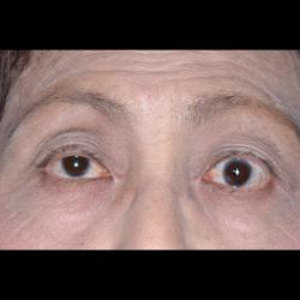

cont：「0」
grav：「1」
評価を中断する: 「2」
ラベルを入力して下さい1


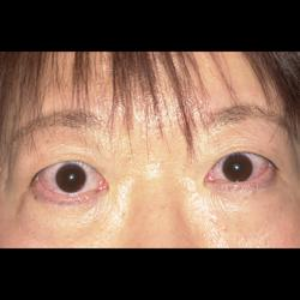

cont：「0」
grav：「1」
評価を中断する: 「2」
ラベルを入力して下さい2
ﾌﾟﾛｸﾞﾗﾑを中断します。あと
632枚です！
有難うございました。


In [109]:
#人による判定
random.shuffle(image_path)

#Alert
alert = [5,10,30,50,100,200,250,300,350,400,450,500,550,600]

for i in image_path:    
    row = df[df['image_name'] == getlabel(i)[0]] #画像のIDと同じ行を抜き出す

    remain_num = df.iloc[:,int(evaluator)+2].isnull().sum() #まだ評価していない画像をカウント
    #print(remain_num)

    if remain_num in alert:
        print('あと'+str(remain_num)+'枚です！\n') 

    if  remain_num == 0: #全画像評価済の場合は終了する　
        print('全画像を判定済みです。有難うございました。')
        break
    elif isinstance(row.iloc[0,int(evaluator)+2], float) == True:  #すでに評価したものはスキップする
        showImage(i) #画像を表示
        
        hum_pred = hum_prediction() #ヒトに判定してもらう
        
        if hum_pred == 'exit':
            print('ﾌﾟﾛｸﾞﾗﾑを中断します。あと\n'+str(remain_num)+'枚です！\n'+'有難うございました。')
            break
        else:
            df.iloc[row.index, int(evaluator)+2] = hum_pred #判定結果を表に追加する
          

In [0]:
day = datetime.date.today()
#CSV形式で保存
csv_path = '/content/drive/My Drive/Deep_learning/gravcont_results/Hum_eval_'+str(day) +'.csv'
csv = df.to_csv(csv_path)

#**画像追加時にリストを合成**

old_file_path：画像ファイル追加前のリスト、評価項目の記入あり
new_file_path：画像ファイル追加後のリスト、評価項目はまだ白紙

番号の一致する画像に関して、old_file_pathで評価した内容をnew_file_pathにインポートする




In [111]:
pd.set_option('display.max_rows', 10)  #表示する最大行数を定義

old_file_path = '/content/drive/My Drive/Deep_learning/gravcont_results/Hum_eval_2020-05-31.csv'
new_file_path = '/content/drive/My Drive/Deep_learning/gravcont_results/Hum_eval_2020-06-01.csv'

df1 = pd.read_csv(old_file_path)
df2 = pd.read_csv(new_file_path) 

df_concat = pd.concat([df1, df2], axis=0) #古いリストと新しいリストを単純に上下に結合
df_concat = df_concat.drop_duplicates(['image_name'], keep='first' ) #"image_name"の項目が重複しているものを削除する
df_concat = df_concat.sort_values('image_name', ascending=True) #"image_name"を昇順に並び替える
df_concat = df_concat.reset_index() #並び替えによりバラバラになったindexをリセットする
df_concat = df_concat.drop(df_concat.columns[[0,1]],axis='columns') #0、1列目の不要なインデックスを削除


print(df_concat)

     image_name Label  inoue  kohzaki  morimoto kitaguchi  kawasaki
0            13  cont    NaN      NaN       NaN       NaN       NaN
1            17  grav    NaN      NaN       NaN      grav       NaN
2            19  grav    NaN      NaN       NaN       NaN       NaN
3            24  grav    NaN      NaN       NaN      cont       NaN
4            27  cont    NaN      NaN       NaN       NaN       NaN
..          ...   ...    ...      ...       ...       ...       ...
630        8079  grav    NaN      NaN       NaN      grav       NaN
631        8105  grav    NaN      NaN       NaN       NaN       NaN
632        8168  grav    NaN      NaN       NaN       NaN       NaN
633        8184  grav    NaN      NaN       NaN       NaN       NaN
634        8198  grav    NaN      NaN       NaN       NaN       NaN

[635 rows x 7 columns]


In [0]:
day = datetime.date.today()
#CSV形式で保存
csv_path = '/content/drive/My Drive/Deep_learning/gravcont_results/Hum_eval_'+str(day) +'.csv'
csv = df_concat.to_csv(csv_path)

#**メールで結果を送信**

In [0]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email.mime.text import MIMEText
from email.utils import COMMASPACE
from email import encoders
import datetime

SUBJECT = 'GravCont Result'
FILENAME = 'Hum_eval.csv'
FILEPATH = csv_path
MY_EMAIL = 'gravcont@gmail.com'
MY_PASSWORD = 'yucizzfxcyelklsm'
TO_EMAIL = 'kitaguchi@yk-gankeisei.com'
SMTP_SERVER = 'smtp.gmail.com'
SMTP_PORT = 587
body = str(datetime.datetime.now())

msg = MIMEMultipart()
msg['From'] = MY_EMAIL
msg['To'] = COMMASPACE.join([TO_EMAIL])
msg['Subject'] = SUBJECT

part = MIMEBase('application', "octet-stream")
part.set_payload(open(FILEPATH, "rb").read())
encoders.encode_base64(part)
part.add_header('Content-Disposition', 'attachment', filename=FILENAME)  # or
# part.add_header('Content-Disposition', 'attachment; filename="attachthisfile.csv"')
msg.attach(part)

body = MIMEText(body)
msg.attach(body)

smtpObj = smtplib.SMTP(SMTP_SERVER, SMTP_PORT)
smtpObj.ehlo()
smtpObj.starttls()
smtpObj.login(MY_EMAIL, MY_PASSWORD)
smtpObj.sendmail(MY_EMAIL, TO_EMAIL, msg.as_string())
smtpObj.quit()

(221, b'2.0.0 closing connection c123sm1798156pfb.102 - gsmtp')